## Statistical Analysis on voter data from the Db.sqlite3 DATABASE

In [ ]:
!pip install faker
!pip install pandas
!pip install openpyxl
!pip install matplotlib

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


### Connect to the SQLITE database

In [24]:
# Store the ethnicities values before populating the database with users:
db_path = 'db.sqlite3'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()



('Eric', 'Weaver')


### Total number of registered voters vs voters who actually voted

In [33]:
# fetch total number of registered voters:
query_total_number_of_registered_voters = """
    SELECT COUNT(*) FROM voteapp_voter;
"""

cursor.execute(query_total_number_of_registered_voters)
result1 = cursor.fetchone()
if(result1):
    print(f"Total number of registered voters: {result1[0]}")

## Fetch number of voters who registered and voted:
query_total_of_voted = """ 
    SELECT COUNT(*) FROM voteapp_voter v 
    JOIN voteapp_vote vt on v.vote_id = vt.id
    WHERE vt.national IS NOT NULL
    AND vt.provincial IS NOT NULL
    AND vt.regional IS NOT NULL
"""

cursor.execute(query_total_of_voted)
result2 = cursor.fetchone()

if(result2):
    print(f"Total number of registered voters who voted {result2[0]}")

conn.commit()

Total number of registered voters: 1000
Total number of registered voters who voted 685


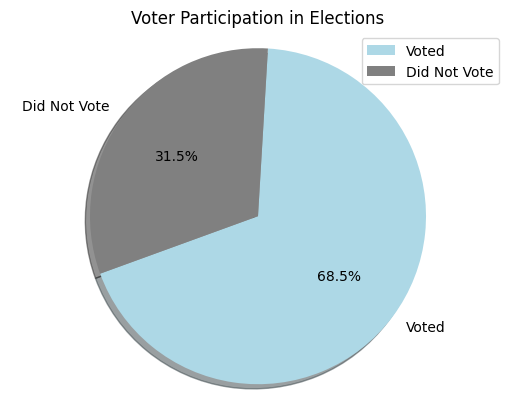

In [57]:
# plotting the above data:

# calculation
total_registered = result1[0]
total_voted = result2[0]
non_voted = total_registered - total_voted

percentage_voted = (total_voted/total_registered) * 100
percentage_non_voted = 100 - percentage_voted

# print(percentage_non_voted)

labels = ['Voted', 'Did Not Vote']
sizes = [percentage_voted, percentage_non_voted]
colors = ['lightblue', 'grey']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=200)
plt.legend(labels, loc="upper right")
plt.title("Voter Participation in Elections")
plt.axis('equal')
plt.show()


### Gender distribution

Query the database for the voter data and plot the gender voting distribution

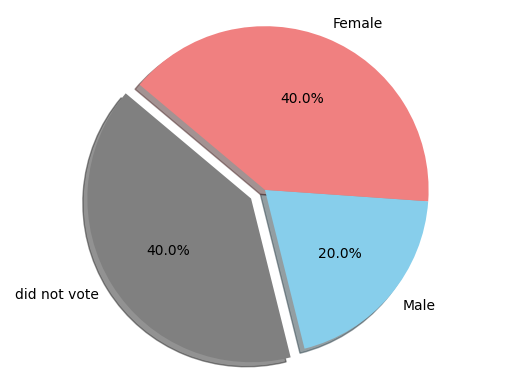

In [12]:
# Query the database for data by connnecting to it first


# Data to plot
labels = ['did not vote', 'Male', 'Female']
sizes = [40, 20, 40]
colors = ['grey', 'skyblue', 'lightcoral']
explode = (0.1, 0, 0,)  # explode 1st slice (Apples)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()


In [64]:
# Get age of users:

def get_birth_year_from_id(idnumber):
    year_prefix = int(idnumber[:2])
    current_year = datetime.now().year % 100  # Get the last two digits of the current year
    century = 1900 if year_prefix > current_year else 2000
    return century + year_prefix

def calculate_age(birth_year):
    current_year = datetime.now().year
    return current_year - birth_year

# Fetch all voters
query_fetch_voters = """
    SELECT firstname, lastname, idnumber FROM voteapp_voter;
"""
cursor.execute(query_fetch_voters)
voters = cursor.fetchall()

# Calculate and print ages
for voter in voters[0:5]:
    firstname, lastname, idnumber = voter
    birth_year = get_birth_year_from_id(idnumber)
    age = calculate_age(birth_year)
    # there is a flaw in the ages in the database, hence we ommit the users below 18 years old
    if(age >= 18): 
        print(f"{firstname} {lastname} (ID: {idnumber}) is {age} years old.")



Melanie Moon (ID: 2701115092525) is 97 years old.
Eric Weaver (ID: 8209174507761) is 42 years old.
Sandra Bradley (ID: 6011278958574) is 64 years old.
Frank Riley (ID: 7612212285834) is 48 years old.


In [15]:
# Close the database connection
conn.close()